<a href="https://www.kaggle.com/code/ifeoluwaoduwaiye/cancer-prediction-with-hyperparameter-tuning?scriptVersionId=123289800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Building a breast cancer prediction model using python,SQL and hyperparameter tuning for SVC and Logistic Regression.

## Table of Contents

1. Introduction
2. Exploratory Data Analysis
3. Model fitting
4. Hyper parameter tuning for Logistic Regression
5. Hyper parameter tuning for SVC

#### First, let's start by importing all the necessary modules.

In [1]:
# Pandas - Data manipulation module

import pandas as pd
import numpy as np


# Data visualization models

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


# Scikit learn modules

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold


# Classification models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm
from lightgbm import LGBMClassifier
import xgboost
from xgboost import XGBClassifier

In [2]:
# Reading in the data

df = pd.read_csv("../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv")

#### Checking the data format

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


#### From here, we can see that there are no missing values in our dataset.

### Data analysis with SQL

#### I'll be answering the following questions:
1. What is the average mean raius of each diagnosis category?
2. What is the diagnosis of the lump with the highest mean area?
3. How many lumps with an above average mean radius are cancerous?
4. What is the probability of a lump with an above average mean radius being cancerous?

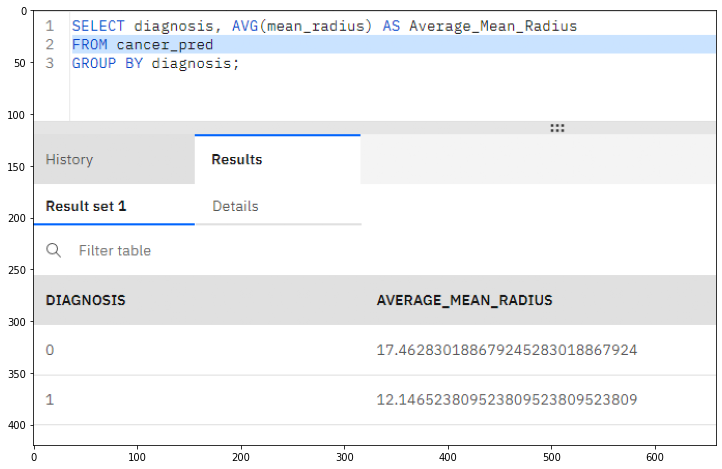

In [5]:
# What is the average mean radius of each diagnosis category?

plt.figure(figsize=(40, 8))
img = mpimg.imread('../input/my-sql/cancersql2.png')
imgplot = plt.imshow(img)
plt.show()

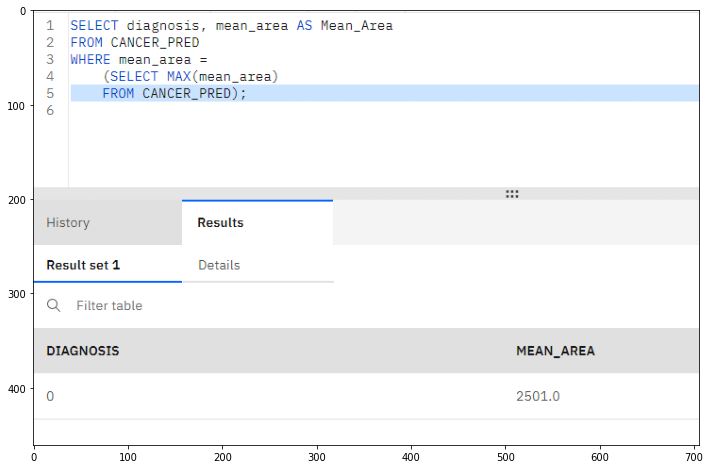

In [6]:
# What is the diagnosis of the lump with the highest mean area?

plt.figure(figsize=(40, 8))
img = mpimg.imread('../input/my-sql/cancersql3.png')
imgplot = plt.imshow(img)
plt.show()

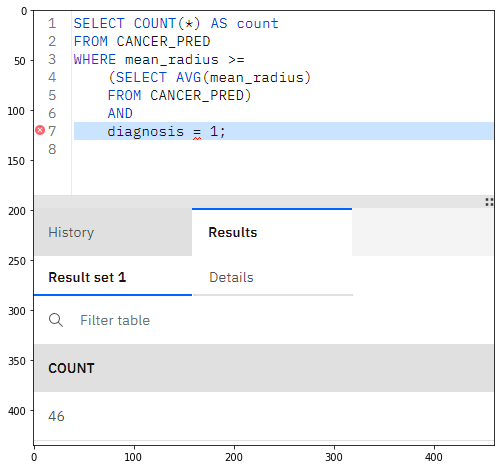

In [7]:
# How many lumps with an above average mean radius are cancerous?

plt.figure(figsize=(40, 8))
img = mpimg.imread('../input/my-sql1/cancersql4.png')
imgplot = plt.imshow(img)
plt.show()

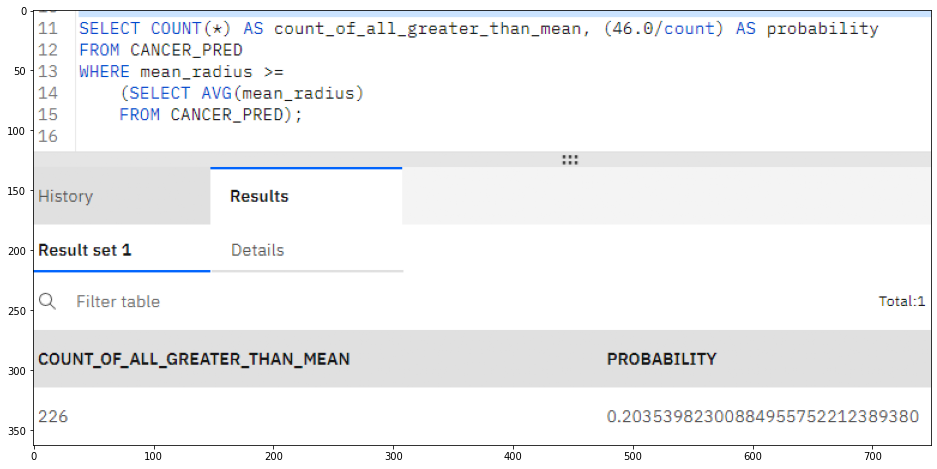

In [8]:
# What is the probability of a lump with an above average mean radius being cancerous?

plt.figure(figsize=(40, 8))
img = mpimg.imread('../input/my-sql1/cancersql6.png')
imgplot = plt.imshow(img)
plt.show()

### Exploratory Data Analysis with matplotlib and seaborn.

Text(0.5, 1.0, 'Barplot of diagnosis versus mean radius')

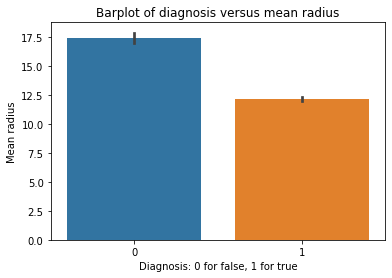

In [9]:
sns.barplot(x="diagnosis", y='mean_radius', data=df)
plt.xlabel("Diagnosis: 0 for false, 1 for true")
plt.ylabel("Mean radius")
plt.title("Barplot of diagnosis versus mean radius")

#### This plot shows that the most lumps that have a higher radius tend to be malignant.

Text(0, 0.5, 'Mean smoothness')

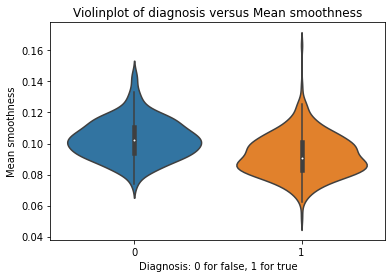

In [10]:
sns.violinplot(x="diagnosis", y="mean_smoothness", data = df)
plt.title("Violinplot of diagnosis versus Mean smoothness")
plt.xlabel("Diagnosis: 0 for false, 1 for true")
plt.ylabel("Mean smoothness")

#### From this plot, we can deduce that cancerous lumps have a wider spread for mean smoothness.

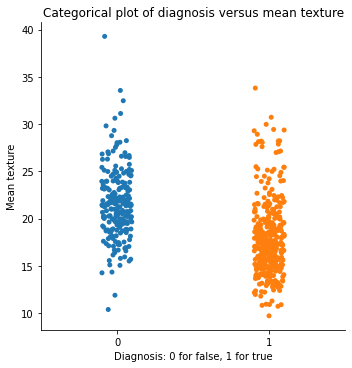

In [11]:
sns.catplot(x='diagnosis', y='mean_texture', data=df)
plt.title("Categorical plot of diagnosis versus mean texture")
plt.xlabel("Diagnosis: 0 for false, 1 for true")
plt.ylabel("Mean texture")
plt.show()

Text(0, 0.5, 'Mean Area')

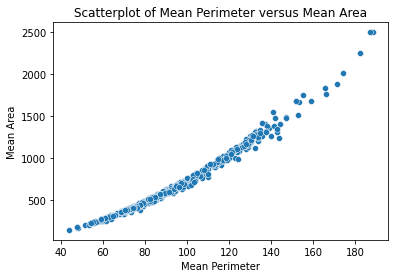

In [12]:
sns.scatterplot(x='mean_perimeter', y='mean_area', data=df)
plt.title("Scatterplot of Mean Perimeter versus Mean Area")
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Area")

#### This plot strongly proves that there is a very strong correlation between the perimeter and the area of the lump.

### Data prepocessing and splitting

In [13]:
# Transform columns into a list

col_list = list(df.columns)

In [14]:
# To remove the target column

col_list.remove("diagnosis")

col_list

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness']

In [15]:
# Instantiate StandardScaler

ss = StandardScaler()

In [16]:
# Transform the label columns

for col in col_list:
    df[col] = ss.fit_transform(df[[col]])

In [17]:
# Split to label and target arrays

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [18]:
# Split data using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.3)

In [19]:
# To determine the most effective model

model_list = [RandomForestClassifier(), LogisticRegression(), SVC(), DecisionTreeClassifier(), LGBMClassifier(), XGBClassifier()]

In [20]:
for l in model_list:
    model = l
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(model, " : ", score)

RandomForestClassifier()  :  0.9239766081871345
LogisticRegression()  :  0.9473684210526315
SVC()  :  0.9415204678362573
DecisionTreeClassifier()  :  0.9239766081871345
LGBMClassifier()  :  0.935672514619883
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)  :  0.935672514619883


## Cancer prediction using logistic Regression Model

### Hyper parameter tuning for Logistic Regression

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.932091 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [23]:
# Instantiate Logistic Regression

model = LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [25]:
y_pred = model.predict(X_test)

In [26]:
# Print model accuracy

f1_score(y_test, y_pred)

0.9541284403669725

### Hyper parameter tuning for SVC

In [27]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.911 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.911 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [29]:
model = SVC(C=1000, gamma=0.001, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.9683257918552036

In [30]:
import joblib

filename = "SVC.joblib"
joblib.dump(model, filename)

['SVC.joblib']